# Finding the Best Markets to Advertise in
A DataQuest Guided Project

### The Question:
What are the two best markets to advertise in for an e-learning company that offers courses on programming?

Courses are mostly web and mobile development with some data science and game development.

### The Data
The data is taken from a [survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) conducted by freeCodeCamp in 2017. The results of which are publicly available on [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
survey.shape

(18175, 136)

In [3]:
survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,...,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,22.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,26.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,32.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,90.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Is the data representative?
We are interested in those who might be interested in our courses so, those who express an interest in web or mobile development.

In [5]:
survey['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                     2.030892
  Mobile Developer                                                                                                                                                         1.673341
Game Developer                                                                                      

Many people are interested in Front-End, Back-End or Full-Stack Web Development.
Many are interested in multiple disciplines. In the first intance it certainly looks like lots are interested in our subject areas. Lets find out exactly how many...

In [6]:
Interests = survey['JobRoleInterest'].dropna() #to avoid errors
Interests['Full'] = survey['JobRoleInterest'].dropna()

In [7]:
WebMob = {'Both': 0,
         'Web': 0,
         'Mobile': 0,
         'None': 0}

for string in Interests['Full']:
    if 'Web' in string and 'Mobile' in string:
        WebMob['Both'] += 1
    elif 'Web' in string:
        WebMob['Web'] += 1
    elif 'Mobile' in string:
        WebMob['Mobile'] += 1
    else:
        WebMob['None'] += 1
        
WebMob

{'Both': 2050, 'Mobile': 254, 'None': 958, 'Web': 3730}

In [8]:
#quick checksum
len(Interests['Full']) == sum(WebMob.values())

True

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x7f99995c5be0>,
 <a list of 4 Text xticklabel objects>)

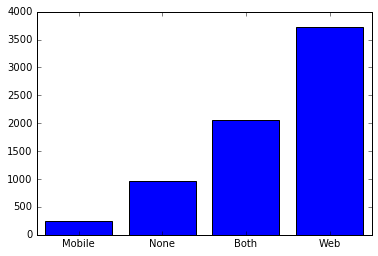

In [10]:
plt.bar(range(len(WebMob)), list(WebMob.values()), align='center')
plt.xticks(range(len(WebMob)), list(WebMob.keys()))

([<matplotlib.patches.Wedge at 0x7f99994a3748>,
  <matplotlib.text.Text at 0x7f99994bd978>])

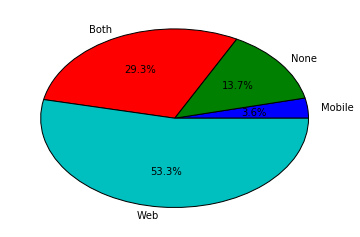

In [11]:
plt.pie(x = list(WebMob.values()), labels = list(WebMob.keys()), autopct = '%1.1f%%')

The vast majority are interested in one of the two key topics, only 13.7% are not interested in either of these. Approximately 80% are interested in Web Development among other things.

Based on this, this population seems representative for the purposes of our question.

We also noticed that many respondents have multiple interests.

#### How many interests do respondents have?

In [12]:
Interests['List'] = Interests['Full'].str.split(",")
Interests['List'].head(5)

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [13]:
Interests['Count'] = Interests['List'].apply(lambda x: len(x))
Interests['Count'].value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

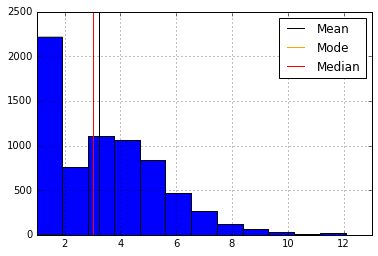

In [14]:
Interests['Count'].hist(bins=13)
plt.xlim(1,13)
plt.axvline(Interests['Count'].mean(), color = 'Black', label = "Mean")
plt.axvline(1, color = 'Orange', label = "Mode")
plt.axvline(Interests['Count'].median(), color = 'Red', label = 'Median')
plt.legend()

Just under a third of recipients have selected a single subject. 20% have chosen 6 or more subjects. This is good as we offer some courses outside of Web & Mobile development but focus in these areas.

### Participant Demographics

In [15]:
#remove respondents who did not provide a role
survey2 = survey[survey['JobRoleInterest'].notnull()].copy()

#Investigate where people are from
absolute = survey2['CountryLive'].value_counts()
relative = survey2['CountryLive'].value_counts(normalize = True) *100

countries = pd.DataFrame(data = {"CountryCount": absolute, 
                     "CountryPct": relative}
            )

print(countries)

                               CountryCount  CountryPct
United States of America               3125   45.700497
India                                   528    7.721556
United Kingdom                          315    4.606610
Canada                                  260    3.802281
Poland                                  131    1.915765
Brazil                                  129    1.886517
Germany                                 125    1.828020
Australia                               112    1.637906
Russia                                  102    1.491664
Ukraine                                  89    1.301550
Nigeria                                  84    1.228429
Spain                                    77    1.126060
France                                   75    1.096812
Romania                                  71    1.038315
Netherlands (Holland, Europe)            65    0.950570
Italy                                    62    0.906698
Serbia                                   52    0

In [16]:
countries['CountryCount'].value_counts().sort_index()

1       31
2       10
3        7
4        4
5        4
6        4
7        2
8        4
9        4
10       3
11       2
12       1
13       2
14       3
15       1
16       2
17       3
19       2
20       2
21       1
23       2
24       1
26       2
28       4
29       3
30       1
31       4
32       2
33       1
34       2
36       1
37       1
39       1
43       1
46       1
52       2
62       1
65       1
71       1
75       1
77       1
84       1
89       1
102      1
112      1
125      1
129      1
131      1
260      1
315      1
528      1
3125     1
Name: CountryCount, dtype: int64

There are a significant number of countries (41) with only one or two respondents, definitely not a big enough sample size to be representative.

Based on the frequency table, the USA and India are the obvious choices for advertising covering just over 50% of all respondents.

### How much are participants willing to spend?

Lets also look at whether or not people are going to be willing to spend money on learning. We will focus in on just 4 countries (USA, UK, India & Canda) which have the highest absolute frequencies and all have a high number of English speakers (our courses are in English)

In [17]:
countries_of_interest = ['United States of America', 'India', 'United Kingdom', 'Canada']

survey3 = survey2[survey2['CountryLive'].isin(countries_of_interest)].copy()

In [18]:
survey3['MonthsProgramming'].value_counts().sort_index().head()

0.0    150
1.0    480
2.0    401
3.0    380
4.0    209
Name: MonthsProgramming, dtype: int64

In [19]:
# To avoid dividing by zero
survey3['MonthsProgramming'].replace(0, 1, inplace = True)

# Create Spend per Month column
survey3['SpendPerMonth'] = survey3['MoneyForLearning']/survey3['MonthsProgramming']

In [20]:
#quick check
survey3['SpendPerMonth'].isna().sum()

313

In [21]:
len(survey3)

4228

In [22]:
# Lets remove those
survey4 = survey3[survey3['SpendPerMonth'].notnull()]
#quick check
len(survey4) == 4228 - 313

True

In [23]:
countries_mean = survey4.groupby('CountryLive').mean()
countries_mean['SpendPerMonth'].sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: SpendPerMonth, dtype: float64

The USA and India are still looking very good. Intuitively, I would have expected India to have the lowest spend per month given its GDP. It is possible that there are problems in the data or this could be correct but slightly surprising lets dig a bit deeper.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


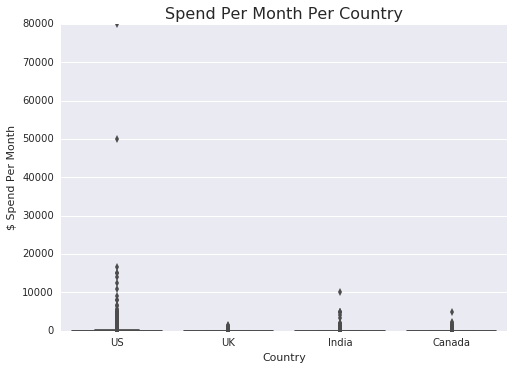

In [24]:
import seaborn as sns
sns.boxplot(y = 'SpendPerMonth', x = 'CountryLive',
            data = survey4)
plt.title('Spend Per Month Per Country',
         fontsize = 16)
plt.ylabel('$ Spend Per Month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


Lets remove some of the extreme outliers.

In [27]:
survey5 = survey4[survey4['SpendPerMonth'] < 10000 ]

In [28]:
countries_mean = survey5.groupby('CountryLive').mean()
countries_mean['SpendPerMonth'].sort_values(ascending = False)

CountryLive
United States of America    155.459187
India                       113.748387
Canada                      113.510961
United Kingdom               45.534443
Name: SpendPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


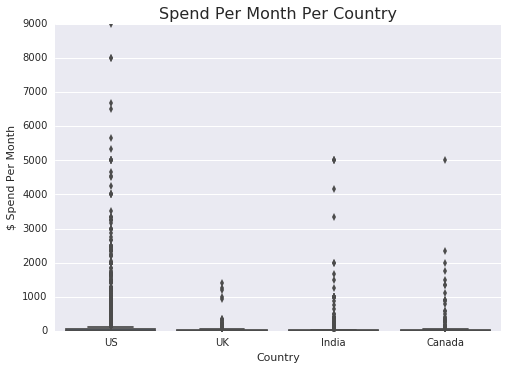

In [26]:
sns.boxplot(y = 'SpendPerMonth', x = 'CountryLive',
            data = survey5)
plt.title('Spend Per Month Per Country',
         fontsize = 16)
plt.ylabel('$ Spend Per Month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [32]:
survey6 = survey4[survey4['SpendPerMonth'] < 100 ]

In [33]:
countries_mean = survey6.groupby('CountryLive').mean()
countries_mean['SpendPerMonth'].sort_values(ascending = False)

CountryLive
United States of America    11.105736
United Kingdom              10.401824
Canada                       8.797879
India                        6.354519
Name: SpendPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


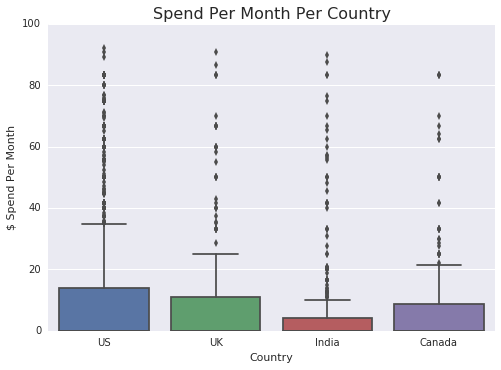

In [34]:
sns.boxplot(y = 'SpendPerMonth', x = 'CountryLive',
            data = survey6)
plt.title('Spend Per Month Per Country',
         fontsize = 16)
plt.ylabel('$ Spend Per Month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Random Other

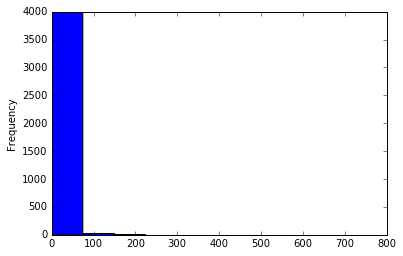

In [33]:
survey3['MonthsProgramming'].plot.hist(bins = 10)

(0, 100)

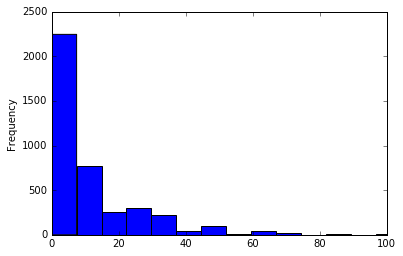

In [35]:
survey3['MonthsProgramming'].plot.hist(bins = 100)
plt.xlim(0,100)

There is a very heavy right skew to the number of months people have been programming. This is good as people are more likely to be learning at this point.

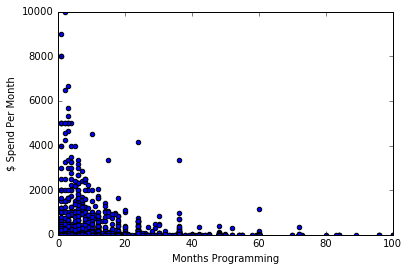

In [86]:
plt.scatter(survey4['MonthsProgramming'], survey4['SpendPerMonth'])
plt.xlim(0,100)
plt.ylim(0,10000)
plt.xlabel('Months Programming')
plt.ylabel('$ Spend Per Month')

Those who are willing to spend more per month have generally done far less programming which is what we would expect.

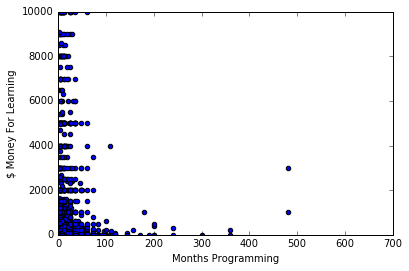

In [88]:
plt.scatter(survey4['MonthsProgramming'], survey4['MoneyForLearning'])
plt.xlim(0,700)
plt.ylim(0,10000)
plt.xlabel('Months Programming')
plt.ylabel('$ Money For Learning')